<a href="https://colab.research.google.com/github/Sandwhaletree/Mai_Finlab/blob/main/C1_%E7%94%A8Python%E7%90%86%E8%B2%A1_%E6%89%93%E9%80%A0%E5%B0%8F%E8%B3%87%E6%97%8F%E9%81%B8%E8%82%A1%E7%AD%96%E7%95%A5/%E7%94%A8_Python_%E7%90%86%E8%B2%A1_%E6%89%93%E9%80%A0%E5%B0%8F%E8%B3%87%E6%97%8F%E9%81%B8%E8%82%A1%E7%AD%96%E7%95%A5_230901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *👉* **Course4-用pandas預測你的人生財務曲線【L12單元】+HW1**

In [ ]:
起始資金 = 30
每月薪水 = 3
每月開銷 = 1 # 不含房租
每月房租 = 1
退休年齡 = 65
預測時段 = range(25, 90, 1)

#### **1)每年淨額 計算**
每年淨額就是每年銀行帳戶的變化值，也就是當年的**總收入** - **總支出**
* 收入的部分有：薪水
* 支出的部分有：開銷、房租

同時必須考慮起始資金跟退休年齡！

<Axes: >

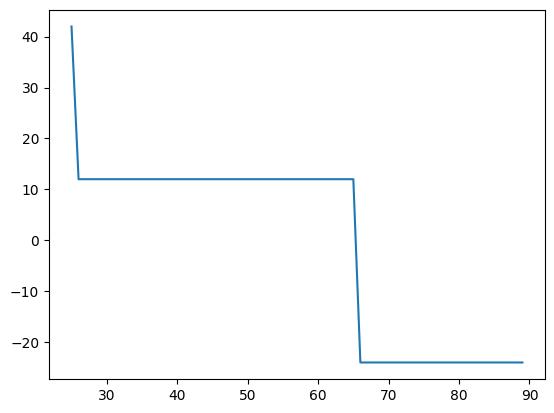

In [ ]:
import pandas as pd

# 每年淨額
每年淨額 = pd.Series(0, index=預測時段)
每年淨額.iloc[0] = 起始資金
每年淨額.loc[:退休年齡] += 每月薪水 * 12
每年淨額 -= (每月開銷 + 每月房租) * 12

%matplotlib inline
每年淨額.plot()

#### **2)沒有投資的總資產變化情況**

<Axes: >

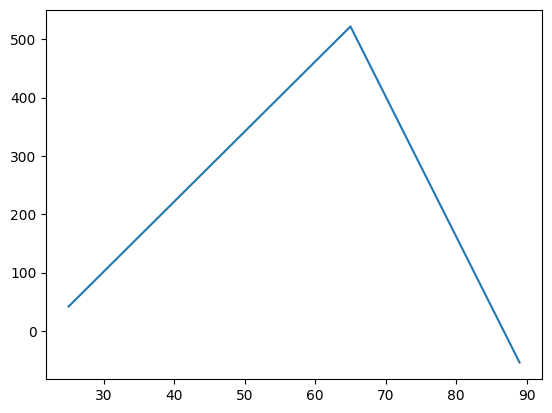

In [ ]:
# 無投資總資產

無投資總資產 = 每年淨額.cumsum()
無投資總資產.plot()

#### **3)有投資的總資產變化情況**

每年，我們都審視前年的帳戶，將資金分成兩份
* 投資金額 = 總帳戶金額 * 投資部位
* 存在帳戶裡不動錢 = 總帳戶金額 * (1 - 投資部位)

所以今年底的帳戶餘額 = 投資金額 * 投資年利率 + 存在帳戶裡不動的錢 + 今年淨額

於是我們可以寫一個函式代表每年的資產增加變化：

<Axes: >

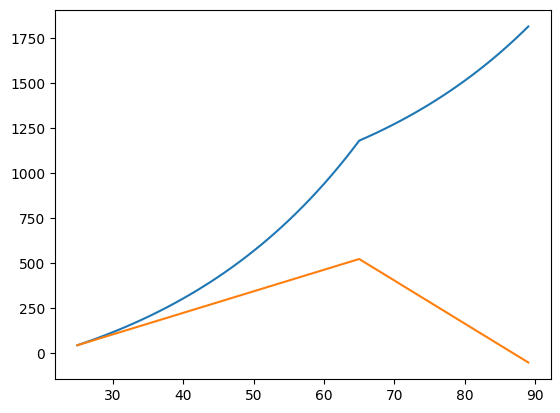

In [ ]:
投資部位 = 0.7
投資年利率 = 5 # 跟影片中不太一樣，影片中：1.05，改成 5% 來表示，比較好理解，也就是一年有5％的報酬率

def compound_interest(arr, ratio, return_rate):
    ret = [arr.iloc[0]]
    for v in arr[1:]:
        ret.append(ret[-1] * ratio * (return_rate/100+1) + ret[-1] * (1 - ratio) + v)
    return pd.Series(ret, 預測時段)

投資總資產 = compound_interest(每年淨額, 投資部位, 投資年利率)
投資總資產.plot()
無投資總資產.plot()

##### **4)考慮買房的話**
* 假設買房總共要花「買房價格」
* 然後一開始，我們會付「買房頭期款」
* 在到達「買房年紀」以前，先租房；從「買房年紀」以後，就是負貸款
* 設定「貸款年數」，設定究竟想要貸款幾年
* 貸款就得付「房貸利率」（％）！

In [ ]:
買房價格 = 300
買房頭期款 = 100
買房年紀 = 35
房貸利率 = 3
貸款年數 = 20

##### **4-1)先計算每年的買房花費**

<Axes: >

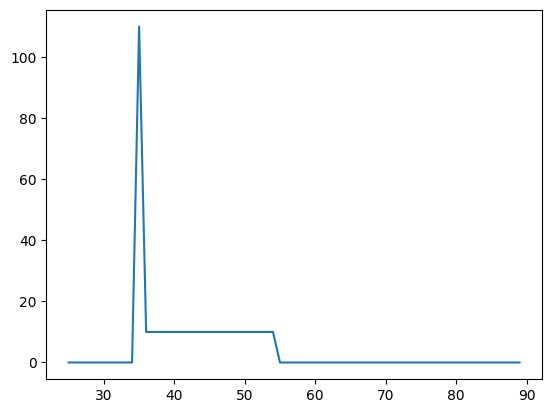

In [ ]:
買房花費 = pd.Series(0, index=預測時段)
買房花費[買房年紀] = 買房頭期款
買房花費.loc[買房年紀:買房年紀+貸款年數-1] += (買房價格 - 買房頭期款) / 貸款年數
買房花費.plot()

##### **5)接下來計算貸款的利息**

<Axes: >

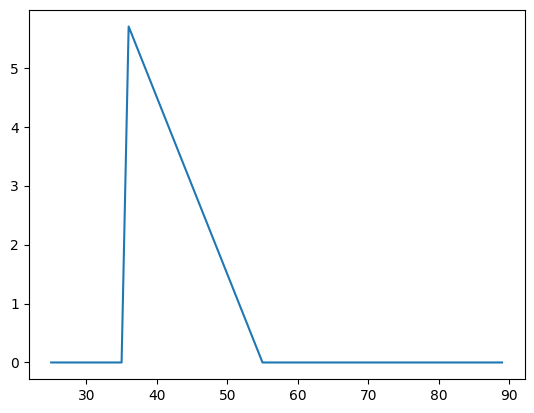

In [ ]:
# 先計算有多少欠款
欠款 = pd.Series(0, index=預測時段)
欠款[買房年紀] = 買房價格
欠款 = 欠款.cumsum()
欠款 = 欠款 - 買房花費.cumsum()
#欠款.plot()
#
利息 = 欠款.shift().fillna(0) * 房貸利率 / 100
利息.plot()

##### **6)計算繳房租**

<Axes: >

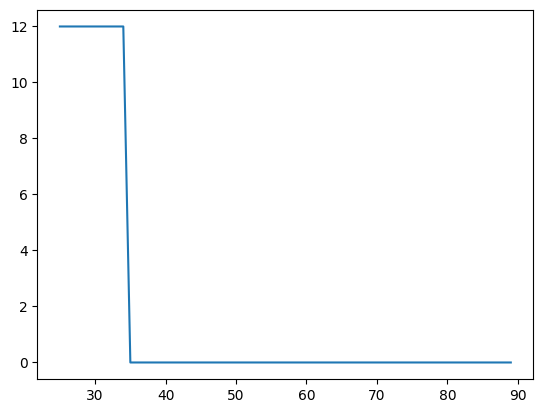

In [ ]:
房租年繳 = pd.Series(每月房租*12, index=預測時段)
房租年繳.loc[買房年紀:] = 0
房租年繳.plot()

<Axes: >

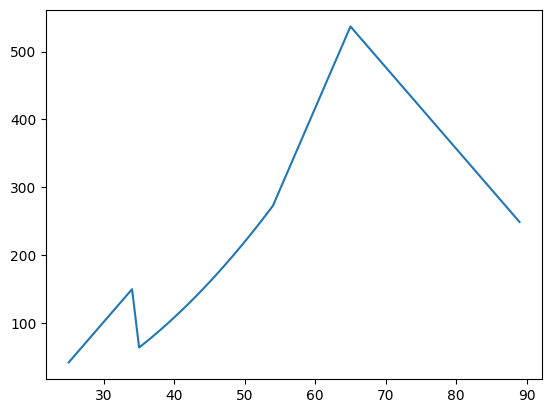

In [ ]:
每年淨額_買房 = pd.Series(0, index=預測時段)
每年淨額_買房.iloc[0] = 起始資金
每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)
每年淨額_買房.cumsum().plot()
#每年淨額_買房.plot()

<Axes: >

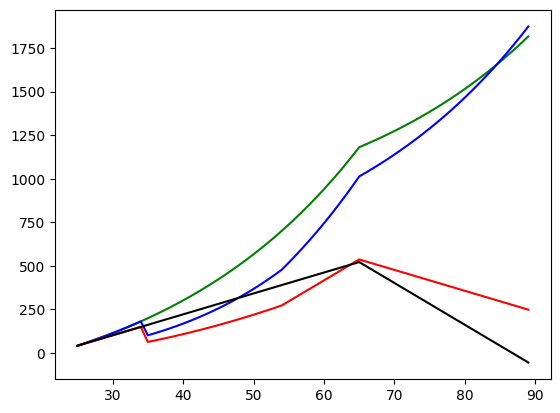

In [ ]:
投資_買房_總資產 = compound_interest(每年淨額_買房, 投資部位, 投資年利率)
#
投資總資產.plot(color='green')
投資_買房_總資產.plot(color='blue')
每年淨額_買房.cumsum().plot(color='red')
無投資總資產.plot(color='black')

interactive(children=(FloatSlider(value=20.0, description='起始資金', step=10.0), IntSlider(value=30, description=…

<function __main__.asset_prediction(起始資金, 起始年紀, 每月薪水, 每月開銷, 每月房租, 退休年齡, 投資部位, 投資年利率, 買房價格, 買房頭期款, 買房年紀, 房貸利率, 貸款年數)>

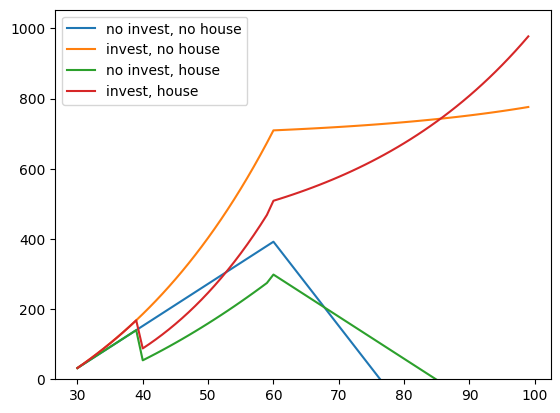

In [ ]:
import pandas as pd
import random
%matplotlib inline
def asset_prediction(起始資金 ,起始年紀,
    每月薪水 ,
    每月開銷 ,
    每月房租 ,
    退休年齡 ,
    投資部位,
    投資年利率,
    買房價格,
    買房頭期款,
    買房年紀,
    房貸利率,
    貸款年數,):

    預測時段 = range(起始年紀, 100)
    每年淨額 = pd.Series(0, index=預測時段)
    每年淨額.iloc[0] = 起始資金
    每年淨額.loc[:退休年齡] += 每月薪水 * 12
    每年淨額 -= (每月開銷 + 每月房租) * 12


    def compound_interest(arr, ratio, return_rate):
        ret = [arr.iloc[0]]
        for v in arr[1:]:
            ret.append(ret[-1] * ratio * (return_rate/100 + 1) + ret[-1] * (1 - ratio) + v)
        return pd.Series(ret, 預測時段)

    買房花費 = pd.Series(0, index=預測時段)
    買房花費[買房年紀] = 買房頭期款
    買房花費.loc[買房年紀:買房年紀+貸款年數-1] += (買房價格 - 買房頭期款) / 貸款年數

    欠款 = pd.Series(0, index=預測時段)
    欠款[買房年紀] = 買房價格
    欠款 = 欠款.cumsum()
    欠款 = 欠款 - 買房花費.cumsum()
    利息 = 欠款.shift().fillna(0) * 房貸利率 / 100


    房租年繳 = pd.Series(每月房租*12, index=預測時段)
    房租年繳.loc[買房年紀:] = 0

    每年淨額_買房 = pd.Series(0, index=預測時段)
    每年淨額_買房.iloc[0] = 起始資金
    每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
    每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)



    pd.DataFrame({
        'no invest, no house': 每年淨額.cumsum(),
        'invest, no house': compound_interest(每年淨額, 投資部位, 投資年利率),
        'no invest, house': 每年淨額_買房.cumsum(),
        'invest, house': compound_interest(每年淨額_買房, 投資部位, 投資年利率),

    }).plot()


    import matplotlib.pylab as plt
    plt.ylim(0, None)

    print('月繳房貸', (買房價格 - 買房頭期款) / 貸款年數 / 12)
    print('利息', 利息.sum() / 貸款年數)
    print('')

import ipywidgets as widgets
widgets.interact(asset_prediction,
    起始資金=widgets.FloatSlider(min=0, max=100, step=10, value=20),
    起始年紀=widgets.IntSlider(min=0, max=100, step=1, value=30),
    每月薪水=widgets.FloatSlider(min=0, max=20, step=0.1, value=3),
    每月開銷=widgets.FloatSlider(min=0, max=20, step=0.2, value=1),
    每月房租=widgets.FloatSlider(min=0, max=20, step=0.5, value=1),
    退休年齡=widgets.IntSlider(min=0, max=100, step=1, value=60),
    投資部位=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.7),
    投資年利率=widgets.FloatSlider(min=0, max=20, step=0.5, value=5),
    買房價格=widgets.IntSlider(min=100, max=2000, step=50, value=300),
    買房頭期款=widgets.IntSlider(min=100, max=2000, step=50, value=100),
    買房年紀=widgets.IntSlider(min=20, max=100, step=1, value=40),
    房貸利率=widgets.FloatSlider(min=1, max=5, step=0.1, value=2.4),
    貸款年數=widgets.IntSlider(min=0, max=40, step=1, value=20)
)

##### **結論**

1. 絕對要開始投資，讓資產報酬率在每年5％就差很多了！
2. 買不買房差很大！
3. 投資部位很重要

### *👉* **Course6-爬蟲網站表格【L14單元】**

#### **網頁爬蟲-初階**
* 今天我們先教最簡單的一種，之後我們會碰到各種不同的情況，今天這招幾乎可以破解60%以上的網頁

* 首先我們要先import requests，可以把它想像成是瀏覽器

In [ ]:
import requests
#下載網頁資訊
res = requests.get('http://www.wibibi.com/info.php?tid=116')

##### 1-1)網頁代碼
* 取得網頁的原始碼

In [ ]:
res.text
#問題:有換行\n且部分中文字沒有

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n"http://www.w3.org/TR/html4/loose.dtd">\n<html>\n<head>\n<title>HTML Table 表格 - Wibibi</title>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta name="description" content="HTML 網頁設計不可或缺的元素就是表格（Table），通常表格用來做版面的排版，而表格的用法包含了幾個重要的標籤，分別是 table、tr 與 td 這幾個重點，組合起來才是">\n<meta name="keywords" content="HTML,Table,表格">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<meta name="robots" content="max-image-preview:large">\n<link href="css/main.css" rel="stylesheet" type="text/css" media="(min-width:641px)" />\n<link href="css/main_small.css" rel="stylesheet" type="text/css" media="(max-width:640px)" />\n<link href="css/info.css" rel="stylesheet" type="text/css" media="(min-width:641px)" />\n<link href="css/info_small.css" rel="stylesheet" type="text/css" media="(max-width:640px)" />\n<link rel="shortcut icon" href="favicon.ico" >\n</head>\n<body>\n<div id="TopDiv">\n\t<div id=\'Head

#### 1-2)轉碼

In [ ]:
#指定編碼，讓res解碼
res.encoding = 'utf-8' # 'big5'
res.text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n"http://www.w3.org/TR/html4/loose.dtd">\n<html>\n<head>\n<title>HTML Table 表格 - Wibibi</title>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta name="description" content="HTML 網頁設計不可或缺的元素就是表格（Table），通常表格用來做版面的排版，而表格的用法包含了幾個重要的標籤，分別是 table、tr 與 td 這幾個重點，組合起來才是">\n<meta name="keywords" content="HTML,Table,表格">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<meta name="robots" content="max-image-preview:large">\n<link href="css/main.css" rel="stylesheet" type="text/css" media="(min-width:641px)" />\n<link href="css/main_small.css" rel="stylesheet" type="text/css" media="(max-width:640px)" />\n<link href="css/info.css" rel="stylesheet" type="text/css" media="(min-width:641px)" />\n<link href="css/info_small.css" rel="stylesheet" type="text/css" media="(max-width:640px)" />\n<link rel="shortcut icon" href="favicon.ico" >\n</head>\n<body>\n<div id="TopDiv">\n\t<div id=\'Head

#### 1-3)轉成DataFrame

接下來的步驟，我們要將文字檔中的table轉成DataFrame，主要可以分成兩個步驟：
* 存成 html 檔
* 用 pandas 讀取 html 檔

In [ ]:
# 存檔；檔名為'test.html'

f = open('test.html', 'w', encoding='utf-8')
f.write(res.text)
f.close()

In [ ]:
# 讀檔並轉成DataFrame

import pandas as pd
dfs = pd.read_html('test.html')

In [ ]:
# 瀏覽
dfs[3]

,0,1
0,這裡是第一行,這裡是第一行
1,這裡是第二行的第一個欄位,這裡是第二行的第二個欄位


#### 2-3)轉成DataFrame（快速版）

其實也可以只寫成一個步驟（但還是建議先存起來）

In [ ]:
# 不存檔直接轉成DataFrame
from io import StringIO

dfs = pd.read_html(StringIO(res.text))
dfs[3]

,0,1
0,這裡是第一行,這裡是第一行
1,這裡是第二行的第一個欄位,這裡是第二行的第二個欄位


### *👉* **Course7-每日爬蟲股價【L16單元】**

#### 今天我們要來建立一個股票爬蟲，最後的成品如下：

In [ ]:
import requests
import pandas as pd
from io import StringIO

In [ ]:
def crawl_price(date):

    # 將 date 變成字串 舉例：'20180525'
    datestr = date.strftime('%Y%m%d')

    # 從網站上依照 datestr 將指定日期的股價抓下來
    r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + datestr + '&type=ALLBUT0999')

    # 將抓下來的資料（r.text），其中的等號給刪除
    content = r.text.replace('=', '')

    # 將 column 數量小於等於 10 的行數都刪除
    lines = content.split('\n')
    lines = list(filter(lambda l:len(l.split('",')) > 10, lines))

    # 將每一行再合成同一行，並用肉眼看不到的換行符號'\n'分開
    content = "\n".join(lines)

    # 假如沒下載到，則回傳None（代表抓不到資料）
    if content == '':
        return None

    # 將content變成檔案：StringIO，並且用pd.read_csv將表格讀取進來
    df = pd.read_csv(StringIO(content))

    # 將表格中的元素都換成字串，並把其中的逗號刪除
    df = df.astype(str)
    df = df.apply(lambda s: s.str.replace(',', ''))

    # 將爬取的日期存入 dataframe
    df['date'] = pd.to_datetime(date)

    # 將「證券代號」的欄位改名成「stock_id」
    df = df.rename(columns={'證券代號':'stock_id'})

    # 將 「stock_id」與「date」設定成index
    df = df.set_index(['stock_id', 'date'])

    # 將所有的表格元素都轉換成數字，error='coerce'的意思是說，假如無法轉成數字，則用 NaN 取代
    df = df.apply(lambda s:pd.to_numeric(s, errors='coerce'))

    # 刪除不必要的欄位
    df = df[df.columns[df.isnull().all() == False]]

    return df

In [ ]:
import datetime
crawl_price(datetime.datetime(2018,1,2))

,,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
stock_id,date,,,,,,,,,,,,,
0050,2018-01-02,3613199,1795,298033251,82.15,82.60,82.15,82.60,0.45,82.55,212,82.60,123,0.00
0051,2018-01-02,9100,8,287540,31.70,31.70,31.31,31.67,0.00,31.60,100,31.67,9,0.00
0052,2018-01-02,3150,5,168550,53.55,53.55,53.50,53.50,0.65,53.50,1,53.65,10,0.00
0053,2018-01-02,11100,11,392110,35.29,35.36,35.25,35.36,0.03,35.39,100,35.71,8,0.00
0054,2018-01-02,2000,2,47940,23.97,23.97,23.97,23.97,0.02,23.93,100,23.97,2,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,2018-01-02,65161,15,1278339,19.40,19.65,19.40,19.65,0.05,19.60,2,19.65,11,50.38
9945,2018-01-02,2066797,987,65803802,31.90,32.00,31.70,32.00,0.05,31.95,18,32.00,210,7.22
9946,2018-01-02,804258,364,10559013,12.80,13.45,12.80,13.45,0.70,13.45,3,13.50,56,14.46


#### **0)觀察網站**
* [台灣證券交易所-盤後資訊>每日收盤行情](https://www.twse.com.tw/zh/trading/historical/mi-index.html)
  > 點選右鍵(選"檢查")或按F12，按BAR上的"NETWORK"(網站流進與流出之request)
  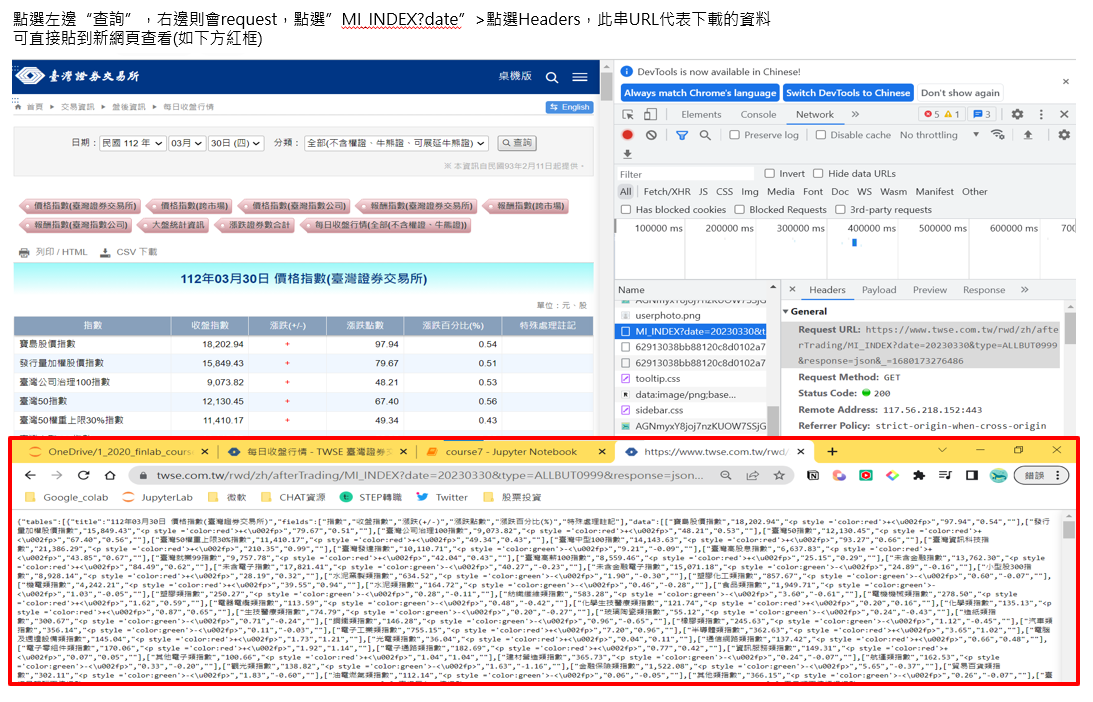

* 檢查Request URL為jason格式(網址連結含Jason)，可以試試將jason文字改成csv(開起EXCEL比較方便)，有可能可以直接下載csv檔案
  * url: https://www.twse.com.tw/rwd/zh/afterTrading/MI_INDEX?date=20230330&type=ALLBUT0999&response=json&_=1680173276486

#### **1)一步步拆解**
* 首先呢，必須知道網址在哪裡，把網址上的資料存成csv檔

In [ ]:
import requests
#2023/3/30；分類:(不含權證、牛熊證、可延展牛熊證)
response = requests.get('https://www.twse.com.tw/rwd/zh/afterTrading/MI_INDEX?date=20230330&type=ALLBUT0999&response=csv&_=1680173276486')

#老師示範網址 http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=20180309&type=ALLBUT0999&_=1520785530355

#### **2)試試看csv能不能直接存到 pandas 的 dataframe 中**



* 發現有點小問題，由於pandas發現每row的長度不一樣，造成pandas無法存取
  * 報錯: ParserError: Error tokenizing data. C error: Expected 7 fields in line 268, saw 17，代表原本預期7個col(即Expected 7 fields)但目前居然有17個col(即saw 17)
  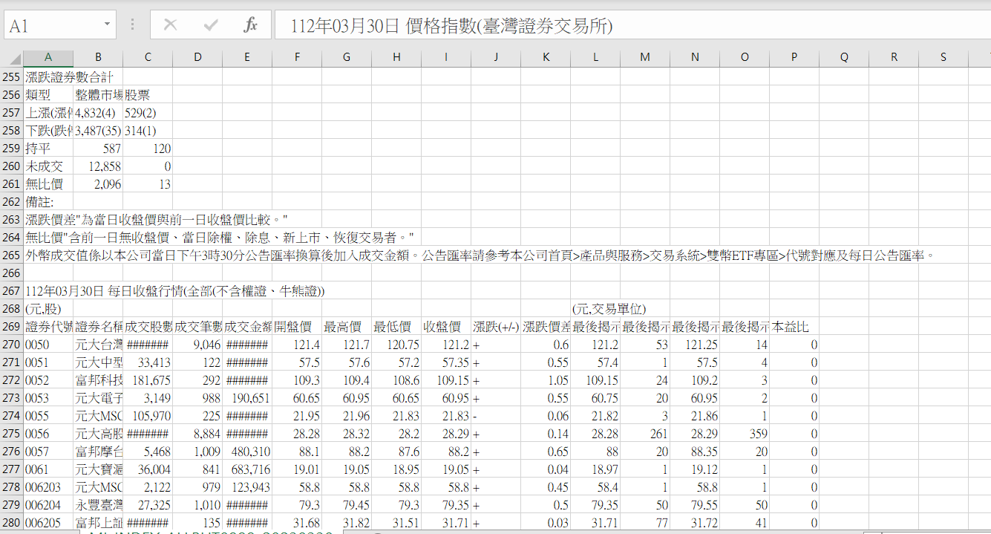

In [ ]:
import pandas as pd
from io import StringIO
df = pd.read_csv(StringIO(response.text))

ParserError: ignored

* split教學

In [ ]:
"123 456".split(' ')

['123', '456']

In [ ]:
#希望將csv中的上半部刪除，故先用split將\n切割
lines = response.text.split('\n')
#檢查第100行
lines[100]

'"特選大蘋果指數","7,153.82","+","64.11","0.90","",\r'

#### **3)用For 迴圈篩選每一行**

* for迴圈小複習

In [ ]:
for i in [1,2,3]:
  print(i)

1
2
3


* append複習

In [ ]:
a=[1,2,3]
a.append(4)
a

[1, 2, 3, 4]

* 為什麼是用17去挑選，而非16(因總共16個欄位)

In [ ]:
#研究第二欄，如果用",去切割，則會有7個東西
lines[1]

'"指數","收盤指數","漲跌(+/-)","漲跌點數","漲跌百分比(%)","特殊處理註記",\r'

In [ ]:
#觀察csv切割後，長度會有多少
for line in lines:
    print(len(line.split('",')))

1
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
1
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
1
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
1
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
1
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
1
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
1
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
1
4
4
4
4
4
4
1
2
2
2
1
1
3
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17

In [ ]:
# 將 newlines 檢查是否有 17個欄位，例如：
'  "你",   "好",   "嗎",'
# 我們想要把它切開，並計算切開後字串被分割成幾個元素，用眼睛看，我們知道上述這行有3個欄位
# 我們不能直接用「,」來切開字串，因為我們假如考慮以下狀況：
'  "你",   ",好,",   "嗎",'
# 上述狀況，正確來說，我們應該要切開三個值（以被「"」包起來和「,」作為判斷），分別為「你」、「,好,」、「嗎」
# 假如直接用「,」分開的話，反而會切成「你」「"」「好」「,」「嗎」，總共五段
# 所以我們發現以「",」來切開字串，就能準確的將上述字串切開，所以在切割時，我們用「",」將每一行切開，並看切成幾個
# 切成17個的話，我們就保留

newlines = []

for line in lines:

    # 用「",」切開每一行，看是否被切成17個
    if len(line.split('",')) == 17:

        # 將 line 加到新的 newlines 中
        newlines.append(line)

print('原本的行數（lines）')
print(len(lines))
print('刪除不需要的行數後，變少了(newlines)')
print(len(newlines))

原本的行數（lines）
1466
刪除不需要的行數後，變少了(newlines)
1191


In [ ]:
#檢查newlines第一行元素
newlines[0]

'"證券代號","證券名稱","成交股數","成交筆數","成交金額","開盤價","最高價","最低價","收盤價","漲跌(+/-)","漲跌價差","最後揭示買價","最後揭示買量","最後揭示賣價","最後揭示賣量","本益比",\r'

In [ ]:
#檢查newlines第二行元素
newlines[1]

'="0050","元大台灣50","11,586,756","9,046","1,404,541,104","121.40","121.70","120.75","121.20","+","0.60","121.20","53","121.25","14","0.00",\r'

#### **4)終於做出dataframe 了！**

In [ ]:
#都是一行行字串，需要思考把它接在一起
newlines[:10]

['"證券代號","證券名稱","成交股數","成交筆數","成交金額","開盤價","最高價","最低價","收盤價","漲跌(+/-)","漲跌價差","最後揭示買價","最後揭示買量","最後揭示賣價","最後揭示賣量","本益比",\r',
 '="0050","元大台灣50","11,586,756","9,046","1,404,541,104","121.40","121.70","120.75","121.20","+","0.60","121.20","53","121.25","14","0.00",\r',
 '="0051","元大中型100","33,413","122","1,919,014","57.50","57.60","57.20","57.35","+","0.55","57.40","1","57.50","4","0.00",\r',
 '="0052","富邦科技","181,675","292","19,827,148","109.30","109.40","108.60","109.15","+","1.05","109.15","24","109.20","3","0.00",\r',
 '="0053","元大電子","3,149","988","190,651","60.65","60.95","60.65","60.95","+","0.55","60.75","20","60.95","2","0.00",\r',
 '="0055","元大MSCI金融","105,970","225","2,322,759","21.95","21.96","21.83","21.83","-","0.06","21.82","3","21.86","1","0.00",\r',
 '="0056","元大高股息","19,920,889","8,884","563,236,386","28.28","28.32","28.20","28.29","+","0.14","28.28","261","28.29","359","0.00",\r',
 '="0057","富邦摩台","5,468","1,009","480,310","88.10","88.20","87.60","88.20","+","0.65","88

* join公式

In [ ]:
#透過join接成字串
"|".join(["abc","efg","hij"])

'abc|efg|hij'

In [ ]:
# 先創造一個字元c(換行符)
c = '\n'
# 利用此字元c，將每一行給連在一起
s = c.join(newlines)
# 將 s 裡面的 等號 刪除
s = s.replace('=', '')

# 將 s 用StringIO變成檔案，並用 pd.read_csv 來讀取檔案
df = pd.read_csv(StringIO(s))

# 顯示前五個
df.head()

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Unnamed: 16
0,0050,元大台灣50,"11,586,756","9,046","1,404,541,104",121.40,121.70,120.75,121.20,+,0.60,121.20,53,121.25,14,0.00,NaN
1,0051,元大中型100,"33,413",122,"1,919,014",57.50,57.60,57.20,57.35,+,0.55,57.40,1,57.50,4,0.00,NaN
2,0052,富邦科技,"181,675",292,"19,827,148",109.30,109.40,108.60,109.15,+,1.05,109.15,24,109.20,3,0.00,NaN
3,0053,元大電子,"3,149",988,"190,651",60.65,60.95,60.65,60.95,+,0.55,60.75,20,60.95,2,0.00,NaN
4,0055,元大MSCI金融,"105,970",225,"2,322,759",21.95,21.96,21.83,21.83,-,0.06,21.82,3,21.86,1,0.00,NaN


#### **5)用 pandas 中的好用 function，將資料作整理！**
上面的資料有點怪怪的，例如：

它們顯示起來像是數字，但其實還是字串！
某些數字中間有','，很煩！
有幾行是來亂的：Unnamed: 16，啥玩意兒？**

* lambds功能

In [ ]:
#定義一個函數func，它input 每一條s，則希望返回去掉,的字串
df = df.astype(str)
def func(s):
  return s.str.replace(',','')

df=df.apply(func)
df.head()

,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
證券代號,,,,,,,,,,,,,
0050,11586756,9046,1404541104,121.4,121.7,120.75,121.2,0.6,121.2,53,121.25,14,0.0
0051,33413,122,1919014,57.5,57.6,57.2,57.35,0.55,57.4,1,57.5,4,0.0
0052,181675,292,19827148,109.3,109.4,108.6,109.15,1.05,109.15,24,109.2,3,0.0
0053,3149,988,190651,60.65,60.95,60.65,60.95,0.55,60.75,20,60.95,2,0.0
0055,105970,225,2322759,21.95,21.96,21.83,21.83,0.06,21.82,3,21.86,1,0.0


In [ ]:
# 將所有df中的元素都變成字串，並將字串中的逗號「,」刪除
df = df.astype(str)
#由函數func簡化而成
df = df.applymap(lambda s: s.replace(',', ''))

# 將 df 證券代號變成 index
df = df.set_index('證券代號')

# 將 df 中的元素從字串變成數字 #藉由to_numeric函數，將字串轉為數字，且[errors='coerce']若轉換失敗，則賦予值為Nan，而非報錯
df = df.apply(lambda s: pd.to_numeric(s,errors='coerce' ))

# 要刪除沒有用的columns
# 其中 axis=1 為是說每條columns去檢查有沒有NaN
# how='all' 是說假如全部都是 NaN 則刪除該 column
# df.isnull().sum() == len(df)檢查非數字的值(即NaN)若等於df長度，代表那一欄都是NaN，則要去掉
# （原本的方法） df = df[df.columns[df.isnull().sum() != len(df)]]

df.dropna(axis=1, how='all', inplace=True)

df.head()

,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
證券代號,,,,,,,,,,,,,
0050,11586756,9046,1404541104,121.40,121.70,120.75,121.20,0.60,121.20,53,121.25,14,0.0
0051,33413,122,1919014,57.50,57.60,57.20,57.35,0.55,57.40,1,57.50,4,0.0
0052,181675,292,19827148,109.30,109.40,108.60,109.15,1.05,109.15,24,109.20,3,0.0
0053,3149,988,190651,60.65,60.95,60.65,60.95,0.55,60.75,20,60.95,2,0.0
0055,105970,225,2322759,21.95,21.96,21.83,21.83,0.06,21.82,3,21.86,1,0.0


In [ ]:
#如果想選0050
df.loc['0050']

成交股數      1.158676e+07
成交筆數      9.046000e+03
成交金額      1.404541e+09
開盤價       1.214000e+02
最高價       1.217000e+02
最低價       1.207500e+02
收盤價       1.212000e+02
漲跌價差      6.000000e-01
最後揭示買價    1.212000e+02
最後揭示買量    5.300000e+01
最後揭示賣價    1.212500e+02
最後揭示賣量    1.400000e+01
本益比       0.000000e+00
Name: 0050, dtype: float64

#### **6)計算長紅棒**

In [ ]:
# 紅棒的長度，1代表不漲不跌，小於一代表收盤價比較小（股價跌），大於一代表收盤價比較大（股票漲）
close_open = df['收盤價'] / df['開盤價']
close_open.head(5)

證券代號
0050    0.998353
0051    0.997391
0052    0.998628
0053    1.004946
0055    0.994533
dtype: float64

In [ ]:
# 選出 收盤 比 開盤 還要高 5% 以上的股票
df[close_open > 1.05]

,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
證券代號,,,,,,,,,,,,,
1538,6855,25,61777,8.61,9.22,8.61,9.22,0.52,8.65,1,9.24,2,0.00
2429,628438,349,11119844,16.65,18.15,16.65,18.15,1.65,18.15,290,NaN,0,0.00
3518,1275587,863,30352815,22.60,24.50,22.60,23.85,1.40,23.85,5,23.90,2,76.94
5284,7251497,4931,801152551,104.00,114.00,104.00,112.50,6.50,112.50,2,113.00,38,22.15
6133,26786384,11997,668136431,23.55,25.55,23.50,24.90,1.65,24.90,140,24.95,24,45.27
6285,37412490,22277,3767949080,95.60,103.50,95.60,103.50,9.10,103.00,296,103.50,1265,13.42
6776,1812224,1473,96630323,50.50,54.90,50.20,54.30,4.30,54.20,1,54.30,5,10.67
6863,1083365,1352,198968357,174.00,188.00,174.00,187.00,11.00,186.00,7,187.00,16,36.45
8110,7296981,2977,98385186,12.80,13.80,12.80,13.55,0.90,13.55,9,13.60,62,27.10


#### **7)存成CSV檔**

In [ ]:
# 將檔案存檔成csv（可以用excel打開）
# 用dataframe存檔，避免中文亂碼，記得要將encoding='utf_8_sig'喔！
df.to_csv('daily_price.csv', encoding='utf_8_sig')

# 讀檔
# 我們指名 index 為 證券代號
df = pd.read_csv('daily_price.csv', index_col=['證券代號'])

print('index為證券代號')
print('     v')
df.head()

index為證券代號
     v


,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
證券代號,,,,,,,,,,,,,
0050,11586756,9046,1404541104,121.40,121.70,120.75,121.20,0.60,121.20,53,121.25,14,0.0
0051,33413,122,1919014,57.50,57.60,57.20,57.35,0.55,57.40,1,57.50,4,0.0
0052,181675,292,19827148,109.30,109.40,108.60,109.15,1.05,109.15,24,109.20,3,0.0
0053,3149,988,190651,60.65,60.95,60.65,60.95,0.55,60.75,20,60.95,2,0.0
0055,105970,225,2322759,21.95,21.96,21.83,21.83,0.06,21.82,3,21.86,1,0.0


#### **8)存到 sqlite3 中**

In [ ]:
# 將 sql 通道打開
import sqlite3
conn = sqlite3.connect('test.sqlite3')

# 存檔 if_exists='replace' 是說假如sql中已經有 daily_price 這個 dataframe，則取代它
df.to_sql('daily_price', conn, if_exists='replace')

# 讀檔
df = pd.read_sql('select * from daily_price', conn, index_col=['證券代號'])
df.head()

,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
證券代號,,,,,,,,,,,,,
0050,11586756,9046,1404541104,121.40,121.70,120.75,121.20,0.60,121.20,53,121.25,14,0.0
0051,33413,122,1919014,57.50,57.60,57.20,57.35,0.55,57.40,1,57.50,4,0.0
0052,181675,292,19827148,109.30,109.40,108.60,109.15,1.05,109.15,24,109.20,3,0.0
0053,3149,988,190651,60.65,60.95,60.65,60.95,0.55,60.75,20,60.95,2,0.0
0055,105970,225,2322759,21.95,21.96,21.83,21.83,0.06,21.82,3,21.86,1,0.0


### 總結一下剛剛教的function：
1. pd.to_numeric(series) <--- 將series轉型成數字。
2. df.apply(func) <--- 將 dataframe 中的每一條 series 都用 func 處理一番。
3. lambda x: y <--- 一個無名氏function，讀入 x 吐出 y。
4. df.set_index(col_name) <--- 將某個column直接變成index
5. df[x] <--- 選取 df 中的 x ，假如 x 是 a (list or series) of (string or boolean)，
假如為 boolean，則長度得跟columns的數目一樣常喔！

### *👉* **Course8-爬蟲月財報【L17單元】**

#### **1)先來讀資料！**
* [公開資訊觀測站>營用概況>每月營收>採用IFRSs後每月營業收入彙總表](hhttps://mops.twse.com.tw/mops/web/t21sc04_ifrs)

In [ ]:
import requests

# 指定爬取月報的網址 #老師範例網址:https://mops.twse.com.tw/nas/t21/sii/t21sc03_106_1_0.html
url = 'https://mops.twse.com.tw/nas/t21/sii/t21sc03_106_1_0.html'
url_1 = 'https://mops.twse.com.tw/nas/t21/sii/t21sc03_111_12_0.html'

# 抓取網頁
r = requests.get(url)
r1 = requests.get(url_1)

##### **1-1)檢查網頁 #HTML網站**

In [ ]:
r.text

'<html><script src=\'/nocopy.js\'></script><head><style text=\'text/css\'><!--\t.tt\t{color:#000099;font-weight:normal;font-size:10pt} --> </style><meta http-equiv=\'Content-Type\' content=\'text/html;charset=big5\'></head><body background=\'/image/bg2.gif\'><center><center><font size=\'5\'><b>¤W¥«¤½¥q106¦~1¤ë¥÷(²Ö\xadp»P·í¤ë)Àç·~¦¬¤J²Î\xadpªí</b></font><h3>¥»¸ê®Æ¥Ñ¦U¤½¥q´£¨Ñ</h3><font size=\'1\'><br><br><input type=\'button\' name=\'download\' value=\'¥t¦sCSV\' onClick=\'document.show_file.fileName.value="t21sc03_106_1.csv";document.show_file.submit();\'>(ÀÉ®×¤º®e¥]§t°ê¤º¤Î°ê¥~¤½¥q)</font><form name=\'show_file\' action=\'/server-java/FileDownLoad\' method=\'post\'><input type=\'hidden\' name=\'step\' value=\'9\'><input type=\'hidden\' name=\'functionName\' value=\'show_file2\'><input type=\'hidden\' name=\'filePath\' value=\'/t21/sii/\'><input type=\'hidden\' name=\'fileName\' value=\'\'></form><br><div class=\'tt\' style=\'width:100%;text-align:left;\'>¤W¥«Âd¤½¥q¡B¿³Âd¤½¥q¡B¤Îª÷ºÞ·|

In [ ]:
r1.text

'<html><script src=\'/nocopy.js\'></script><head><style text=\'text/css\'><!--\t.tt\t{color:#000099;font-weight:normal;font-size:10pt} --> </style><meta http-equiv=\'Content-Type\' content=\'text/html;charset=big5\'></head><body background=\'/image/bg2.gif\'><center><center><font size=\'5\'><b>¤W¥«¤½¥q111¦~12¤ë¥÷(²Ö\xadp»P·í¤ë)Àç·~¦¬¤J²Î\xadpªí</b></font><h3>¥»¸ê®Æ¥Ñ¦U¤½¥q´£¨Ñ</h3><font size=\'1\'><br><br><input type=\'button\' name=\'download\' value=\'¥t¦sCSV\' onClick=\'document.show_file.fileName.value="t21sc03_111_12.csv";document.show_file.submit();\'>(ÀÉ®×¤º®e¥]§t°ê¤º¤Î°ê¥~¤½¥q)</font><form name=\'show_file\' action=\'/server-java/FileDownLoad\' method=\'post\'><input type=\'hidden\' name=\'step\' value=\'9\'><input type=\'hidden\' name=\'functionName\' value=\'show_file2\'><input type=\'hidden\' name=\'filePath\' value=\'/t21/sii/\'><input type=\'hidden\' name=\'fileName\' value=\'\'></form><br><div class=\'tt\' style=\'width:100%;text-align:left;\'>¤W¥«Âd¤½¥q¡B¿³Âd¤½¥q¡B¤Îª÷ºÞ

##### **1-2)儲存成檔案 #用pandas開啟**

In [ ]:
from io import StringIO
import pandas as pd

dfs=pd.read_html(StringIO(r.text))
dfs_1=pd.read_html(StringIO(r1.text))

##### **1-3)檢查發現有亂碼**

In [ ]:
dfs[0]

,0
0,²£·~§O¡G¤ôªd¤u·~³æ¦ì¡G¤d¤¸ Àç·~¦¬¤J²Ö­pÀç·~¦¬¤...


In [ ]:
dfs_1[0]

,0
0,²£·~§O¡G¤ôªd¤u·~³æ¦ì¡G¤d¤¸ Àç·~¦¬¤J²Ö­pÀç·~¦¬¤...


##### **1-4)解碼用big5>再次嘗試**

In [ ]:
from io import StringIO
import pandas as pd

# 讓pandas可以讀取中文（測試看看，假如不行讀取中文，就改成 'utf-8'）
r.encoding = 'big5'
r1.encoding = 'big5'

# 把剛剛下載下來的網頁的 html 文字檔，利用 StringIO() 包裝成一個檔案給 pandas 讀取
dfs = pd.read_html(StringIO(r.text))
dfs_1 = pd.read_html(StringIO(r1.text))

##### **1-5)檢查皆為正常**

In [ ]:
dfs[2]

Unnamed: 0_level_0 Unnamed: 1_level_0      營業收入                      \
                公司代號               公司名稱      當月營收      上月營收    去年當月營收   
0               1101                 台泥   6131670   9418581   6575590   
1               1102                 亞泥   4162130   6023954   5066062   
2               1103                 嘉泥    232657    382981    197328   
3               1104                 環泥    363865    463842    373311   
4               1108                 幸福    316773    345573    348266   
5               1109                 信大    333060    514449    338758   
6               1110                 東泥    104003    142422    140339   
7                 合計                 合計  11644158  17291802  13039654   

                         累計營業收入                       備註  
  上月比較增減(%) 去年同月增減(%)    當月累計營收    去年累計營收 前期比較增減(%)   備註  
0    -34.89     -6.75   6131670   6575590     -6.75    -  
1    -30.90    -17.84   4162130   5066062    -17.84    -  
2    -39.25     17.90    232657    197328     17.90    -  
3    -21.55     -2.53    363865    373311     -2.53    -  
4     -8.33     -9.04    316773    348266     -9.04    -  
5    -35.25     -1.68    333060    338758     -1.68    -  
6    -26.97    -25.89    104003    140339    -25.89    -  
7    -32.66    -10.70  11644158  13039654    -10.70  NaN

In [ ]:
dfs_1[2]

Unnamed: 0_level_0 Unnamed: 1_level_0      營業收入                      \
                公司代號               公司名稱      當月營收      上月營收    去年當月營收   
0               1101                 台泥  12584154   9674576  10821264   
1               1102                 亞泥   8340507   8306062   9403723   
2               1103                 嘉泥    228644    221763    171518   
3               1104                 環泥    725055    631827    569625   
4               1108                 幸福    418326    383773    319245   
5               1109                 信大    516142    669587    777783   
6               1110                 東泥    167733    198316    184874   
7                 合計                 合計  22980561  20085904  22248032   

                          累計營業收入                       \
  上月比較增減(%) 去年同月增減(%)     當月累計營收     去年累計營收 前期比較增減(%)   
0     30.07     16.29  112968787  107044614      5.53   
1      0.41    -11.30   90344463   90332604      0.01   
2      3.10     33.30    2253659    2217656      1.62   
3     14.75     27.28    7055812    6079074     16.06   
4      9.00     31.03    4149480    3769022     10.09   
5    -22.91    -33.63    6388379    7378229    -13.41   
6    -15.42     -9.27    1794572    1840595     -2.50   
7     14.41      3.29  224955152  218661794      2.87   

                                                  備註  
                                                  備註  
0  以上營收不包含停業部門營收:111年12月 0 仟元暨110年12月 0 仟元；111年1-...  
1                                                  -  
2                                                  -  
3                                                  -  
4                                                  -  
5                                                  -  
6                                                  -  
7                                                NaN

##### **1-6)list複習: 幫你生成0-19的一個list**

In [ ]:
list(range(20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
dfs_1['公司代號'] == '合計'

TypeError: ignored

* 來處理資料

In [ ]:
# 將dfs中，row長度介於5~11的table合併（這些才是我們需要的table，其他table不需要）
df = pd.concat([df for df in dfs[2:] if df.shape[1] <= 11 and df.shape[1] > 5])

# 設定column名稱
df.columns = df.columns.get_level_values(1)
df = df.rename(columns={'公司 代號': '公司代號'})

# 將 df 中的當月營收用 .to_numeric 變成數字，再把其中不能變成數字的部分以 NaN 取代（errors='coerce'）
df['當月營收'] = pd.to_numeric(df['當月營收'], 'coerce')

# 再把當月營收中，出現 NaN 的 row 用 .dropna 整行刪除
df = df[~df['當月營收'].isnull()]

# 刪除「公司代號」中出現「合計」的行數，其中「～」是否定的意思
df = df[df['公司代號'] != '合計']

# # 將「公司代號」與「公司名稱」共同列為 df 的 indexes
df = df.set_index(['公司代號', '公司名稱'])

df.head()

,,當月營收,上月營收,去年當月營收,上月比較增減(%),去年同月增減(%),當月累計營收,去年累計營收,前期比較增減(%),備註
公司代號,公司名稱,,,,,,,,,
1101,台泥,6131670,9418581,6575590,-34.89,-6.75,6131670,6575590,-6.75,-
1102,亞泥,4162130,6023954,5066062,-30.90,-17.84,4162130,5066062,-17.84,-
1103,嘉泥,232657,382981,197328,-39.25,17.90,232657,197328,17.90,-
1104,環泥,363865,463842,373311,-21.55,-2.53,363865,373311,-2.53,-
1108,幸福,316773,345573,348266,-8.33,-9.04,316773,348266,-9.04,-


#### **2)存檔csv (全版本通用)**

In [ ]:
# ----------- #
# 存取 csv 檔  #
# ----------- #

# 把 df 存成 csv 檔，並且命名為「test.csv」，指定用「utf_8_sig」編碼
df.to_csv('test.csv', encoding='utf_8_sig')

# 讀取名為「test.csv」的 csv 檔，並且指定其中欄位名稱為「公司代號」與「公司名稱」作為 df 的 indexes
df = pd.read_csv('test.csv', index_col=['公司代號','公司名稱'])
df.head()

,,當月營收,上月營收,去年當月營收,上月比較增減(%),去年同月增減(%),當月累計營收,去年累計營收,前期比較增減(%),備註
公司代號,公司名稱,,,,,,,,,
1101,台泥,6131670,9418581,6575590,-34.89,-6.75,6131670,6575590,-6.75,-
1102,亞泥,4162130,6023954,5066062,-30.90,-17.84,4162130,5066062,-17.84,-
1103,嘉泥,232657,382981,197328,-39.25,17.90,232657,197328,17.90,-
1104,環泥,363865,463842,373311,-21.55,-2.53,363865,373311,-2.53,-
1108,幸福,316773,345573,348266,-8.33,-9.04,316773,348266,-9.04,-


#### **3)存檔sqlite3 (全版本通用)**

In [ ]:
# --------------- #
# 存取 sqlite3 檔  #
# --------------- #

import sqlite3

# 把 df 存成名為「monthly_report」的 sqlite3 檔，其中 conn 是與 database 的連結
conn = sqlite3.connect('test.sqlite3')
df.to_sql('monthly_report', conn, if_exists='replace')

# 讀取 sqlite3 中名為「monthly_report」的 table，並且指定其中欄位名稱為「公司代號」與「公司代號」作為 df 的 indexes
df = pd.read_sql('select * from monthly_report', conn, index_col=['公司代號','公司名稱'])
df.head()


,,當月營收,上月營收,去年當月營收,上月比較增減(%),去年同月增減(%),當月累計營收,去年累計營收,前期比較增減(%),備註
公司代號,公司名稱,,,,,,,,,
1101,台泥,6131670,9418581,6575590,-34.89,-6.75,6131670,6575590,-6.75,-
1102,亞泥,4162130,6023954,5066062,-30.90,-17.84,4162130,5066062,-17.84,-
1103,嘉泥,232657,382981,197328,-39.25,17.90,232657,197328,17.90,-
1104,環泥,363865,463842,373311,-21.55,-2.53,363865,373311,-2.53,-
1108,幸福,316773,345573,348266,-8.33,-9.04,316773,348266,-9.04,-


### *👉* **Course9-爬蟲每季更新財報【L18單元】**

#### **1)獲取財報資訊**

這個單元將教您如何獲取財報，網址如下:
* [合併財報IFRS網址](http://mops.twse.com.tw/server-java/t164sb01?step=1&CO_ID=1101&SYEAR=2017&SSEASON=3&REPORT_ID=C)

在這一串網址中，有幾個重要的元素：
* step: 1 （不知道做啥用的）
* CO_ID: 1101 （股票代號）
* SYEAR: 2017 （年）
* SSEASON: 3 （季）
* REPORT_ID：個別財報(A)  個體財報(B)  合併報表(C)

這邊的report ID，我們必須要以合併報表優先（90%以上的財報都是合併財報），假如沒有合併報表，我們在抓個體財報喔！

In [ ]:
# 將網站給爬下來
import requests
res = requests.get('https://mops.twse.com.tw/server-java/t164sb01?step=1&CO_ID=1101&SYEAR=2017&SSEASON=3&REPORT_ID=C')
res.encoding = 'big5' # 也可以試試看 'utf-8' 試到 res.text 沒有中文亂碼就可以囉！

In [ ]:
#檢查網站資訊
res.text[:1000]

'<html>\r\n<head>\r\n<META NAME = "ROBOTS" CONTENT = "NOINDEX,NOFOLLOW,NOARCHIVE">\r\n<META HTTP-EQUIV=\'Content-Type\' CONTENT=\'text/html; charset=big5\'>\r\n<link href = \'/css.css\' rel = \'stylesheet\' type = \'text/css\'>\r\n<link rel = "stylesheet" type = "text/css" href = "/dialog_box.css" />\r\n<script type = "text/javascript" src = "/dialog_box.js"></script>\r\n<script type = "text/javascript" src = "/js/json/json2.js"></script>\r\n<title>IFRS單一公司案例文件預覽及下載</title>\r\n</head>\r\n<body id = "content_d"><center>\r\n<h2 align = \'center\'><font color = \'blue\'>IFRS單一公司案例文件預覽及下載</font></h2>\r\n<center>\r\n<form action = \'/server-java/t164sb01\' method = \'post\' id = \'t164form\' name = \'t164form\' >\r\n<input type=\'hidden\' name = \'step\' id = \'step\' value = \'1\'><input type=\'hidden\' name = \'DEBUG\' id = \'DEBUG\' value = \'\'>2330<br>\r\n2330\r\n代號查詢<br>\r\n代號查詢\r\n\u3000查\u3000詢\u3000<br>\r\n\u3000查\u3000詢\u3000\r\n<table border = \'0\' width = \'800px\'>\r\n<tr>\r\n

In [ ]:
from io import StringIO
import pandas as pd

# 將 res.text 用 StringIO 轉成 檔案 再用 pd.read_html 將 html文字檔轉成 dataframe
dfs = pd.read_html(StringIO(res.text))

In [ ]:
#網站內有很多用途表格，包含財務4表、會計師意見、被投資公司名稱、為他人背書保證...
dfs[1]

,會計項目,2017年09月30日,2016年12月31日,2016年09月30日
,資產負債表,資產負債表,資產負債表,資產負債表
0,資產,NaN,NaN,NaN
1,流動資產,NaN,NaN,NaN
2,現金及約當現金,NaN,NaN,NaN
3,現金及約當現金總額,26608300.0,28179758.0,27229371.0
4,透過損益按公允價值衡量之金融資產－流動,NaN,NaN,NaN
...,...,...,...,...
96,非控制權益,40744347.0,40628620.0,40281876.0
97,權益總額,152966569.0,147396671.0,145457904.0
98,負債及權益總計,269457896.0,266988696.0,265077946.0


##### **2)如何批次處理將2個公司枝財報抓取下來**

In [ ]:
#for sid in ['1101', '2330']:
import time
import os

# 假如沒有 course9 這個資料夾，則自動建立course9資料夾
if 'course9' not in os.listdir():

    # 就創建一個
    os.mkdir('course9')

# 想要爬的股票代號
sid = ['1101', '2330']

# 對於每一筆股票代號
for s in sid:

    # 爬取它的html檔
    res = requests.get('https://mops.twse.com.tw/server-java/t164sb01?step=1&CO_ID=' + s + '&SYEAR=2017&SSEASON=3&REPORT_ID=C')
    res.encoding = 'big5'

    # 【join解決windows存檔不知報要用正或反斜線】設定存檔的路徑 ex: course9\1101.html
    path = os.path.join('course9', s + '.html')

    # 將檔案打開，寫入html，然後關閉
    f = open(path, 'w', encoding='utf-8')
    f.write(res.text)
    f.close()

    print(s)

    # 休息20秒，在跑下一支股票，否則會被封鎖
    time.sleep(20)

1101
2330


In [ ]:
dfs = []

# 對於每一支股票
for s in sid:

    # 將檔案 ex: course9\1101.html 拿出來
    path = os.path.join('course9', s + '.html')

    # 存在 dfs 中，並以encoding='utf-8'解亂碼
    dfs.append(pd.read_html(path, encoding='utf-8'))

In [ ]:
# 抓取 2330 的第一張dataFrame前10個row

dfs[1][1].head(10)

,會計項目,2017年09月30日,2016年12月31日,2016年09月30日
,資產負債表,資產負債表,資產負債表,資產負債表
0,資產,NaN,NaN,NaN
1,流動資產,NaN,NaN,NaN
2,現金及約當現金,NaN,NaN,NaN
3,現金及約當現金總額,408077695.0,541253833.0,463971657.0
4,透過損益按公允價值衡量之金融資產－流動,NaN,NaN,NaN
5,透過損益按公允價值衡量之金融資產－流動合計,1125668.0,6451112.0,1848317.0
6,備供出售金融資產－流動,NaN,NaN,NaN
7,備供出售金融資產－流動淨額,84953011.0,67788767.0,45815003.0
8,持有至到期日金融資產－流動,NaN,NaN,NaN


#### **1)獲取財報資訊**

這個單元將教您如何獲取財報

### *👉* **Course10-爬蟲每季更新財報【L19單元】**

In [ ]:
from finlab.crawler import (
    widget,

    crawl_price,
    crawl_monthly_report,
    crawl_finance_statement_by_date,

    date_range, month_range, season_range
)

import sqlite3
import os
conn = sqlite3.connect(os.path.join('data', "data.db"))

widget(conn, 'price', crawl_price, date_range)
widget(conn, 'monthly_revenue', crawl_monthly_report, month_range)
widget(conn, 'finance_statement', crawl_finance_statement_by_date, season_range)

ModuleNotFoundError: ignored

### 👉 **Course13-用指標分析|用KD值來存股【L22單元】**

In [ ]:
from finlab.data import Data

# 可以從 data 中讀取資料
data = Data()

In [ ]:
# 從 close, high, low 取從最新的一筆資料往前算，2000筆資料
close = data.get('收盤價', 2000)
high = data.get('最高價', 2000)
low = data.get('最低價', 2000)

In [ ]:
import talib
import pandas as pd

# 利用 talib 來計算 0050 這檔股票的指標
kd = talib.STOCH(high['0050'].ffill().values,
                 low['0050'].ffill().values,
                 close['0050'].ffill().values,
                 fastk_period=9, slowk_period=3
                 , slowd_period=3, slowk_matype=1, slowd_matype=1)

# 將 kd 值 分別轉換成 k、d 兩條 series
k = pd.Series(kd[0], index=close['0050'].index)
d = pd.Series(kd[1], index=close['0050'].index)

# & 代表 「且」 的意思，這邊的條件就是
# k.shift(1) 可以想成「昨天」的意思，同理 k.shift(2) 就是前天
# 當（今天的 k > d ）且 （昨天的 k < d） 且 （今天的 k < 30） 時，買入

buy = (k > d) & (k.shift(1) < d.shift(1)) & (k < 30)

# 起始資金為 30 萬，這段可以參考「老師的話」當中的範例
arr = [30]
for v, p in zip(buy[1:], close['0050'].shift(-2)/close['0050'].shift(-1)):
    arr.append(arr[-1]*p + v)

# 畫圖
%matplotlib inline

# 先畫出 0050 收盤價
close['0050'].plot(secondary_y=True, color='gray')

# 畫出投資獲利
pd.Series(arr, index=close['0050'].index).plot()

# 畫出買入的時間點
buy.astype(int).plot()

# 畫出一樣的金額假如放在銀行，的資產變化
(buy.astype(int).cumsum() + 30).plot()